# Preprocessing
## Using 2018 data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


### Data cleaning

In [2]:
sp_df = pd.read_csv('/Users/jordynohashi/Desktop/COGS118A/Group019-Sp22/SP500/SP500_processed.csv', index_col=0)
news_df = pd.read_csv('/Users/jordynohashi/Desktop/COGS118A/Group019-Sp22/2018news_sentiments.csv', index_col=0)


In [3]:
#str date to datetime object
news_df['date']=news_df['date'].apply(lambda row: datetime.strptime(row, "%m/%d/%Y"))
#round true values
sp_df['true_value'] = sp_df['true_value'].apply(lambda x: np.round(x))
#rename col
sp_df.rename(columns = {'Date':'date'}, inplace = True)
#change type
sp_df['date'] = sp_df['date'].astype('datetime64[ns]')

In [4]:
sp_df.head()

,date,index,Open,High,Low,Close,Volume,up/down,true_value
0,2018-01-02,-1.725164,-0.648749,-0.717987,-0.450101,-0.502990,-0.356569,0.996024,1.0
1,2018-01-03,-1.711363,-0.506020,-0.519223,-0.305372,-0.330849,-0.107277,0.996024,1.0
2,2018-01-04,-1.697561,-0.289100,-0.358751,-0.105322,-0.221778,0.120476,0.996024,1.0
3,2018-01-05,-1.683760,-0.167600,-0.206454,-0.022204,-0.030579,-0.546551,0.996024,1.0
4,2018-01-08,-1.669959,-0.052975,-0.152031,0.068712,0.014927,-0.537782,0.996024,1.0


In [5]:
news_df.head()

,date,News Sentiment
0,2018-01-01,0.256823
1,2018-01-02,0.249558
2,2018-01-03,0.268506
3,2018-01-04,0.240391
4,2018-01-05,0.239910


In [6]:
df = pd.merge(sp_df, news_df, on="date", how="left")
df = df[['date', 'index', 'Open', 'High', 'Low', 'Close', 'Volume', 'up/down', 'News Sentiment','true_value']]

In [7]:
df.head()

,date,index,Open,High,Low,Close,Volume,up/down,News Sentiment,true_value
0,2018-01-02,-1.725164,-0.648749,-0.717987,-0.450101,-0.502990,-0.356569,0.996024,0.249558,1.0
1,2018-01-03,-1.711363,-0.506020,-0.519223,-0.305372,-0.330849,-0.107277,0.996024,0.268506,1.0
2,2018-01-04,-1.697561,-0.289100,-0.358751,-0.105322,-0.221778,0.120476,0.996024,0.240391,1.0
3,2018-01-05,-1.683760,-0.167600,-0.206454,-0.022204,-0.030579,-0.546551,0.996024,0.239910,1.0
4,2018-01-08,-1.669959,-0.052975,-0.152031,0.068712,0.014927,-0.537782,0.996024,0.274052,1.0


In [8]:
y = df["true_value"]
X = df.iloc[:, 1:-1]

In [9]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scores = []

#run logistic model
log = LogisticRegression(random_state=42).fit(X_train, y_train)
scores = np.append(scores,log.score(X_test, y_test))

#run random forest
ran = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
scores = np.append(scores,ran.score(X_test, y_test))

#run decision tree
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
scores = np.append(scores,tree.score(X_test, y_test))

#run SVM 
svm = SVC(gamma='auto').fit(X_train, y_train)
scores = np.append(scores,svm.score(X_test, y_test))

#run KNN
neighbor = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = np.append(scores,neighbor.score(X_test, y_test))


Text(0.5, 1.0, 'Models')

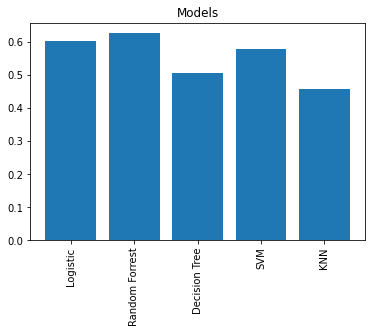

In [10]:
plt.figure()
plt.bar(range(5), scores)
labels = ['Logistic','Random Forrest','Decision Tree','SVM','KNN']
plt.xticks(range(5),labels,rotation='vertical')
plt.title('Models')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

In [12]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# prob = clf.predict_proba(X_test)
# prob = prob[:,1]

# roc_auc = roc_auc_score(y_test, prob)
# fpr, tpr, thresholds = roc_curve(y_test, prob)

# # plotting the ROC curve
# plt.figure(dpi=100)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# print('Area under the Receiver Operating Characteristic curve:', 
#       roc_auc)